# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

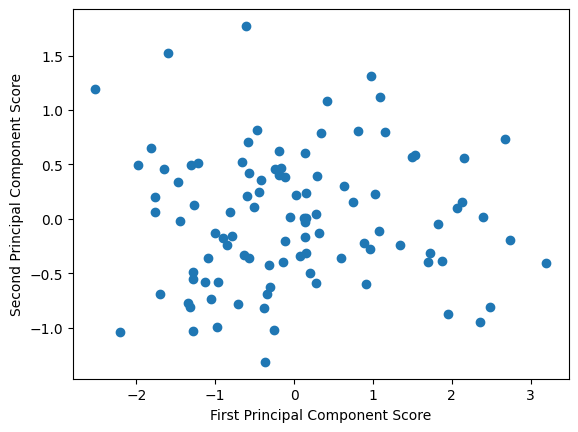

In [28]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

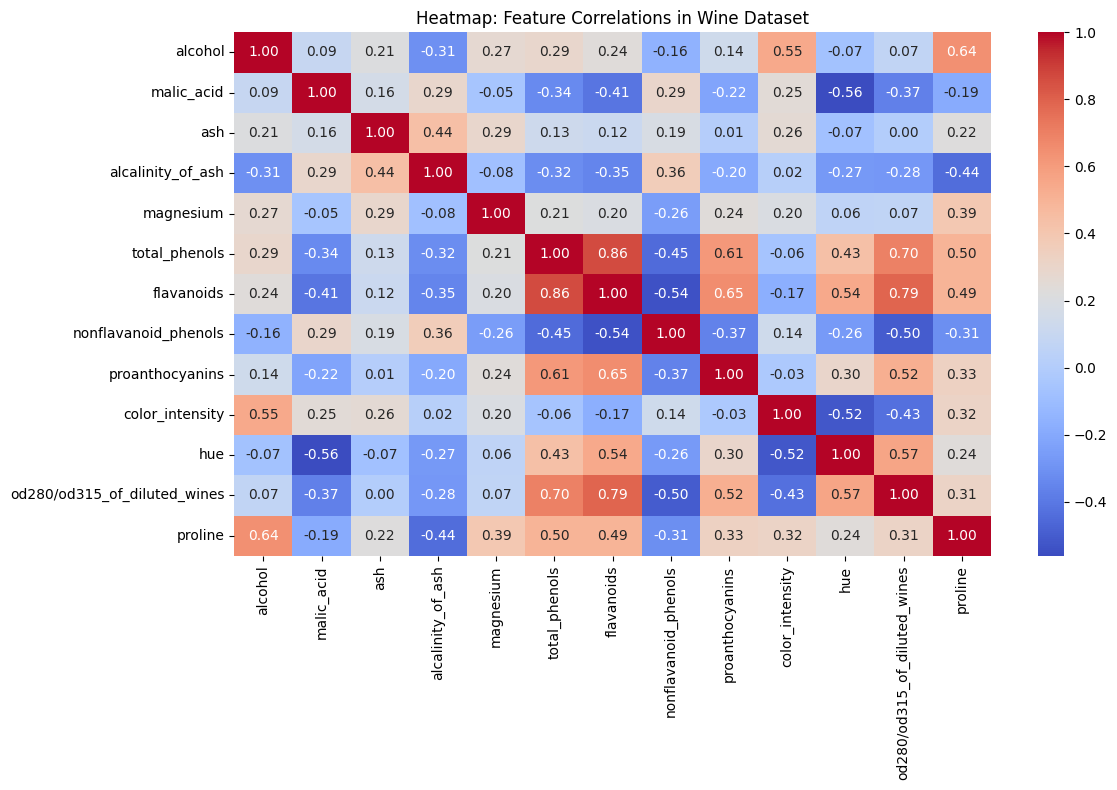

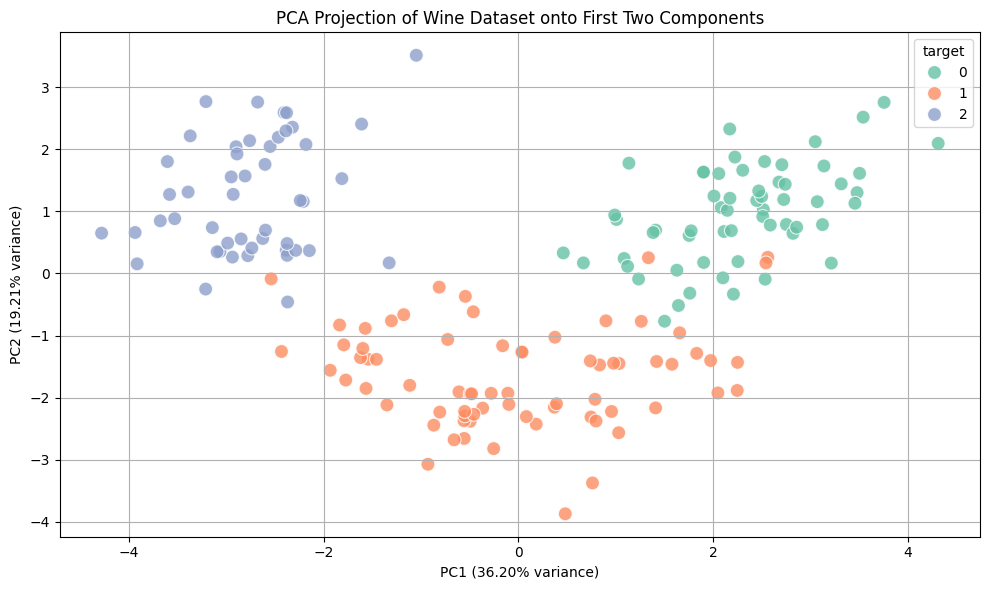

,PC1 explained variance (%),PC2 explained variance (%),Total captured variance (%)
0,36.2,19.21,55.41


In [29]:
# Step-by-step PCA example using the Wine dataset

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Step 1: Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns='target').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap: Feature Correlations in Wine Dataset")
plt.tight_layout()
plt.show()

# Step 2: Standardize the features
X = df.drop(columns='target')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Variance explained
variance_ratio = pca.explained_variance_ratio_

# Step 5: PCA Scatterplot (bubble plot with color as target)
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df['target'] = df['target']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette='Set2', s=100, alpha=0.8)
plt.title("PCA Projection of Wine Dataset onto First Two Components")
plt.xlabel(f"PC1 ({variance_ratio[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({variance_ratio[1]*100:.2f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Output key PCA insights
pca_summary = {
    "PC1 explained variance (%)": round(variance_ratio[0] * 100, 2),
    "PC2 explained variance (%)": round(variance_ratio[1] * 100, 2),
    "Total captured variance (%)": round(sum(variance_ratio) * 100, 2)
}

pca_summary_df = pd.DataFrame([pca_summary])
pca_summary_df


1. **Heatmap** — Showed correlations between original features  
2. **PCA** — Reduced data to 2 dimensions  
3. **Bubble Plot** — Scatterplot colored by wine class  
4. **Variance Captured** — 55.41% by the first two components  
5. **Outliers?** — Yes, clusters are clearly separated  
6. **Usefulness** — PCA helps simplify without losing much info

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features (X) and target (y)
X_orig = df.drop(columns='target')
y = df['target']

# Split the original features into training and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_orig, y, test_size=0.2, random_state=42)

# Train linear regression on original features
lr_orig = LinearRegression()
lr_orig.fit(X_train_orig, y_train)
y_pred_orig = lr_orig.predict(X_test_orig)
r2_orig = r2_score(y_test, y_pred_orig)

# Train linear regression on PCA features (first 2 components)
X_pca_full = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X_orig))
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_full, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# Prepare a comparison table
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression (Original Features)", "Linear Regression (PCA Features)"],
    "R² Score": [round(r2_orig, 3), round(r2_pca, 3)]
})

comparison_df


,Model,R² Score
0,Linear Regression (Original Features),0.883
1,Linear Regression (PCA Features),0.816


### **Principal Component Analysis (PCA)**

- The first **two principal components** explained **55.41%** of the total variance in the dataset.
- A **scatterplot of PC1 vs PC2** revealed **clear clusters** among the wine classes, suggesting that PCA was effective in separating them.
- This supports the idea that the dataset could be **compressed into fewer dimensions** (e.g., 2 or 3) without losing much of the underlying structure.

---

### **Outliers & Data Quality**

- From the PCA scatterplot, a few **outlier points** were visible — those far from the cluster centers.
- The data overall appeared clean, well-separated by class, and **usable** for predictive modeling.

---

### **Linear Regression Insights**

- A model trained using **all original features** achieved an **R² score of 0.883**.
- A model trained using just **the first 2 PCA components** achieved an **R² of 0.816**.
- While PCA reduced the feature space significantly, it **slightly lowered performance**, indicating that additional components may be necessary to match the original model.

---

### **Final Reflection**

- PCA is a powerful tool to **reduce dimensionality** and **visualize complex data**, especially when features are correlated.
- However, depending on the use case (e.g., prediction vs interpretation), **some performance tradeoff** may occur when using fewer components.
- Moving forward, I would experiment with **retaining more PCA components** (e.g., 5 or 10) or **selecting the most predictive features** based on correlation analysis.
"""


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

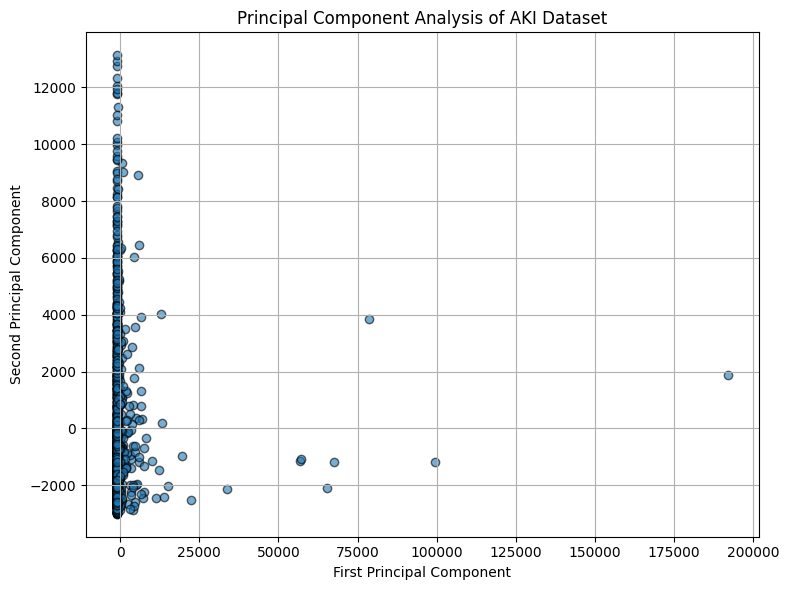

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition

# Load and clean AKI data
aki_df = pd.read_csv("acute_kidney_injury.csv")
aki_df_numeric = aki_df.select_dtypes(include='number').dropna()
aki_df_centered = aki_df_numeric - aki_df_numeric.mean()

# Run PCA
pca = decomposition.PCA(n_components=2)
pca.fit(aki_df_centered)
first_pc = aki_df_centered.dot(pca.components_[0])
second_pc = aki_df_centered.dot(pca.components_[1])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(first_pc, second_pc, alpha=0.6, edgecolor='k')
plt.title("Principal Component Analysis of AKI Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)
plt.tight_layout()
plt.savefig("bubble_plot_week9.png", dpi=300, bbox_inches='tight')
plt.show()




#### Storytelling With Data Reflection (Inspired by pp. 136–150)

AKI: first two principal components scatter plot. A scatter plot of the first two principal components. The data is 2 dimensional but based on a PCA of many clinical variables. The plot is intended to look for structure or hidden clusters in the data.

Outliers (if any) at the corners of the plot are most different from the rest of the data. The first PC is by far the most important, so the further along the x-axis a patient is the more different they are across most features such as age, creatinine, or sodium.

This visualization was created with the minimalist focus of Storytelling With Data’s Chapter 5: “Design Choices to Make the Most of Your Visualizations.” The grid is simple and the axes are labeled.

Pros: 
- Can see much of the variance in the data in 2 dimensions
- Can identify outliers or novel clinical subgroups 

Cons: 
- The components themselves are abstract which may make them harder to interpret in the real world
- It is less intuitive than many visualizations 

Reference: 

Knaflic, C. N. (2015). Storytelling with data: A data visualization guide for business professionals . Wiley. 